<a href="https://colab.research.google.com/github/LeMagnifiq/Bike-Demand-Prediction/blob/main/Bike_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collection

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

In [2]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

# Download the zip file
!wget $url -O Bike-Sharing-Dataset.zip

# Unzip the file
!unzip Bike-Sharing-Dataset.zip

# Read the 'hour.csv' file
data = pd.read_csv('hour.csv')

# Print the first few rows
print(data.head())


--2023-06-18 18:25:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase     [  <=>               ] 273.43K  1.07MB/s    in 0.3s    

2023-06-18 18:25:43 (1.07 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3

## Exploratory Data Analysis (EDA)

In [3]:
#Check for missing values
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [4]:
#Check the data types of the columns
print(data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


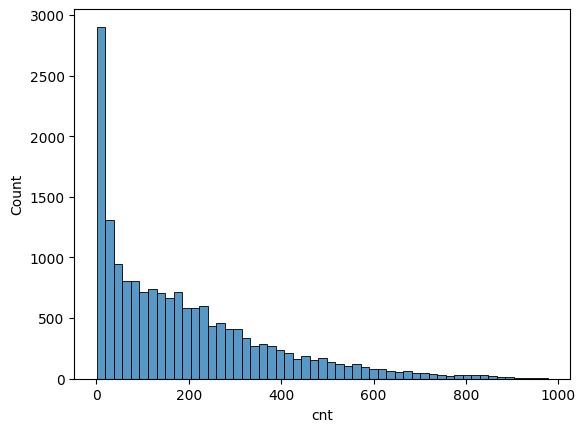

In [5]:
#Visualise the distribution of target variable (cnt)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['cnt'])
plt.show()

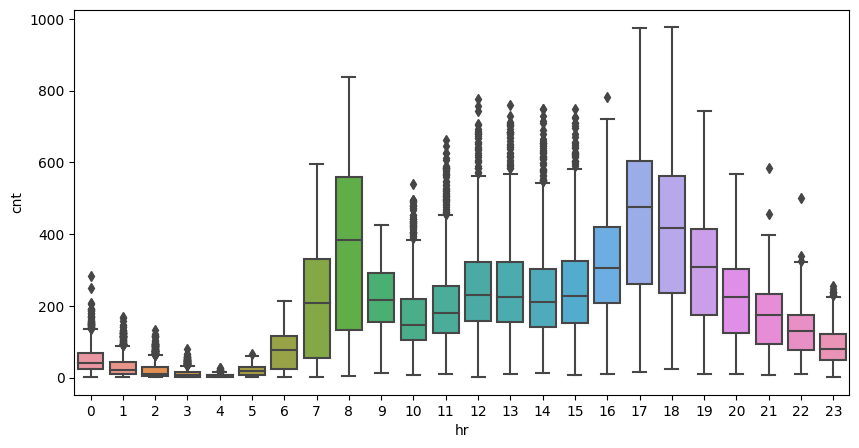

In [6]:
#See how the demand varies with different hours of the day
plt.figure(figsize=(10,5))
sns.boxplot(x=data['hr'], y=data['cnt'])
plt.show()

In [7]:
avg_demand_per_hour = data.groupby('hr')['cnt'].mean()
avg_demand_per_hour_sorted = avg_demand_per_hour.sort_values(ascending=False)
print(avg_demand_per_hour_sorted)


hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64


### Bike demand across different seasons

In [8]:
avg_demand_per_season = data.groupby('season')['cnt'].mean()
print(avg_demand_per_season)

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


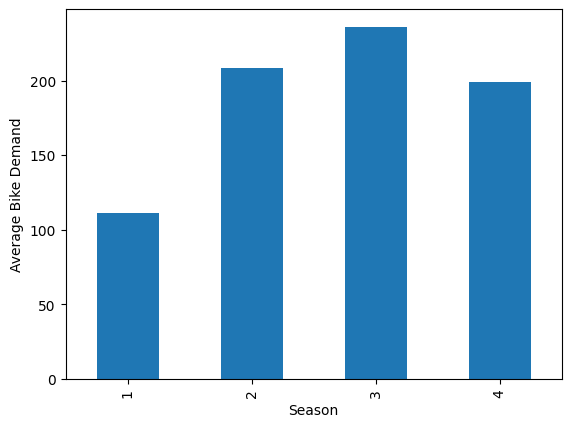

In [9]:
avg_demand_per_season.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Bike Demand')
plt.show()


### Bike demand on weekdays vs weekends

In [10]:

data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x==5 or x==6 else 0)

avg_demand_weekday_vs_weekend = data.groupby('is_weekend')['cnt'].mean()
print(avg_demand_weekday_vs_weekend)


is_weekend
0    187.971082
1    193.158032
Name: cnt, dtype: float64


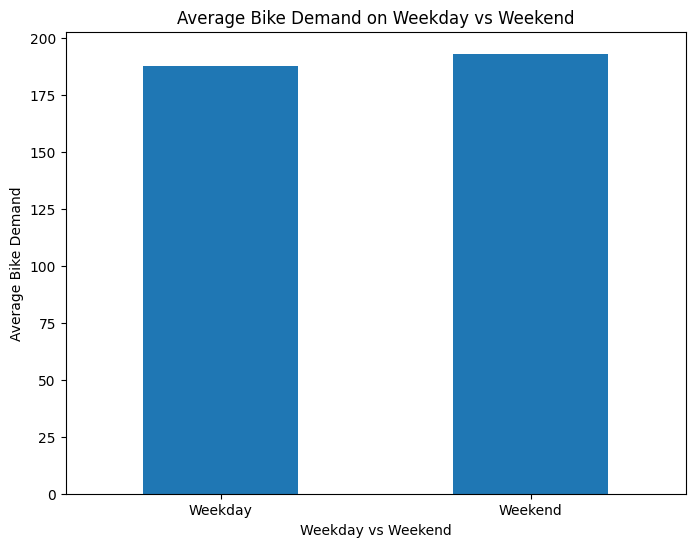

In [11]:
avg_demand_weekday_vs_weekend.plot(kind='bar', figsize=(8,6))
plt.xlabel('Weekday vs Weekend')
plt.ylabel('Average Bike Demand')
plt.xticks([0,1], ['Weekday', 'Weekend'], rotation=0)
plt.title('Average Bike Demand on Weekday vs Weekend')
plt.show()


### Bike demand during holidays vs non-holidays

In [12]:
avg_demand_holiday_vs_nonholiday = data.groupby('holiday')['cnt'].mean()
print(avg_demand_holiday_vs_nonholiday)

holiday
0    190.42858
1    156.87000
Name: cnt, dtype: float64


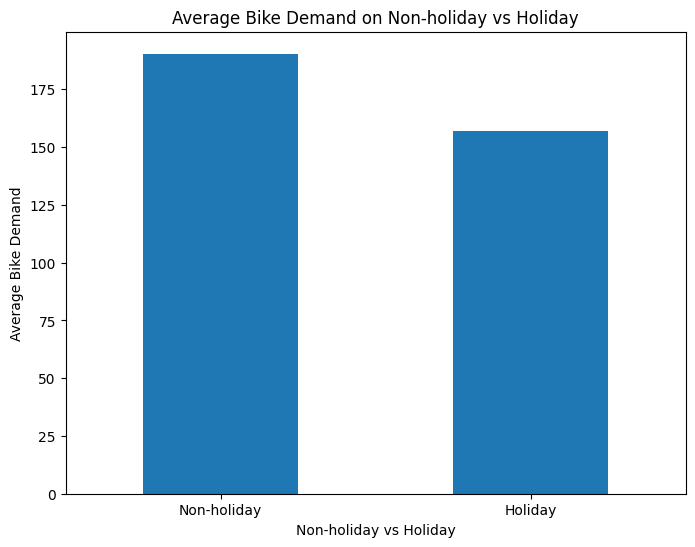

In [13]:
avg_demand_holiday_vs_nonholiday.plot(kind='bar', figsize=(8,6))
plt.xlabel('Non-holiday vs Holiday')
plt.ylabel('Average Bike Demand')
plt.xticks([0,1], ['Non-holiday', 'Holiday'], rotation=0)
plt.title('Average Bike Demand on Non-holiday vs Holiday')
plt.show()


### Correlation Between Variables

In [14]:
correlation_matrix = data.corr()
print(correlation_matrix)


             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

<ipython-input-14-e02734b85495>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


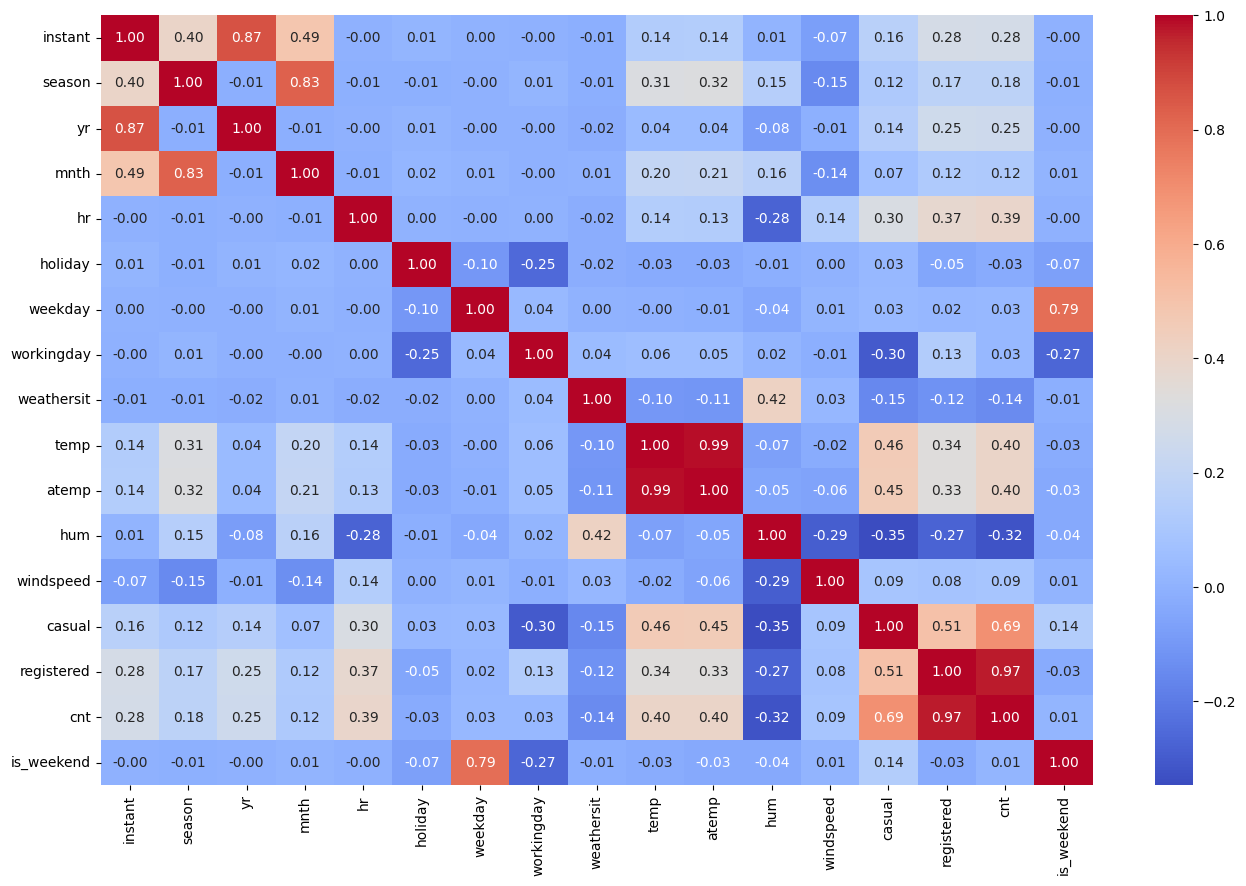

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()


## Feature Selection/Engineering

In [16]:
#Creating a new feature indicating whether it's a "working hour" or not
def working_hours(row):
    if row['hr'] >= 8 and row['hr'] <= 17:
        return 1
    else:
        return 0

data['working_hours'] = data.apply(working_hours, axis=1)


In [17]:
# Convert the 'dteday' column to datetime format
data['dteday'] = pd.to_datetime(data['dteday'])

# Extract year, month, and day to new separate columns
data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month
data['day'] = data['dteday'].dt.day

# Now you can drop the 'dteday' column if you want
data = data.drop(['dteday'], axis=1)




In [18]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop('cnt', axis=1)
y = data['cnt']

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

          feature    importance
14     registered  9.469582e-01
13         casual  5.279722e-02
11            hum  3.261410e-05
0         instant  2.994583e-05
19            day  2.937238e-05
12      windspeed  2.495348e-05
4              hr  2.152491e-05
9            temp  2.070789e-05
10          atemp  2.053062e-05
6         weekday  1.320571e-05
3            mnth  1.304113e-05
18          month  1.267174e-05
8      weathersit  6.466612e-06
1          season  5.464140e-06
7      workingday  4.417304e-06
15     is_weekend  3.397298e-06
16  working_hours  3.150132e-06
17           year  1.362191e-06
2              yr  1.184638e-06
5         holiday  5.608553e-07


### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Define numerical features
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

# Scale numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])


## Model Selection and Training

### Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = data.drop('cnt', axis=1)
y = data['cnt']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')


MSE: 8.201338681766101e-22
RMSE: 2.863797947091607e-11
MAE: 2.4726412836431873e-11
R2: 1.0


### Random Forests

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Drop 'casual' and 'registered' features
X = X.drop(['casual', 'registered'], axis=1)

# Define the model
model = RandomForestRegressor()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print scores
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())


Cross-validation scores:  [0.56686196 0.88414715 0.68995862 0.91632452 0.87044097]
Average cross-validation score:  0.7855466444865151


###Decision Trees

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Evaluating the model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')


Training MSE: 0.0
Test MSE: 26.730149597238206


### Decision Trees (Tuned Hyperparameters)

In [26]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=42) # set max_depth to some reasonable value
dt.fit(X_train, y_train)

# Evaluating the model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')


Training MSE: 11.121844922566604
Test MSE: 38.125808502665905


### Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0)
gb.fit(X_train, y_train)

# Evaluating the model
y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred_gb)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred_gb)}')


Training MSE: 3.77394764532315
Test MSE: 7.557012395184496


### Hyperparameter Tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 7),
    'min_samples_leaf': randint(1, 3),
    'learning_rate': uniform(0.01, 0.2)
}

random_search = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(max_depth=5,
                                                       random_state=0),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7521ae33d0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f755a896dd0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7521ae1210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7521ae2d10>})

In [30]:
# Get the best parameters
best_params = random_search.best_params_
print("Best parameters: ", best_params)

# Get the best score
best_score = random_search.best_score_
print("Best score: ", best_score)


Best parameters:  {'learning_rate': 0.06033787076360639, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 278}
Best score:  0.9997863986435442


In [32]:
# Initialize and fit the model with best parameters
gbr_best = GradientBoostingRegressor(**best_params)
gbr_best.fit(X_train, y_train)

# Predict on the test data
y_test_pred = gbr_best.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE with best parameters: {mse_test}')


Test MSE with best parameters: 5.807282971979999


### Feature Importance

In [34]:
importances = random_search.best_estimator_.feature_importances_
feature_importances = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
feature_importances = feature_importances.sort_values("Importance", ascending=False)
print(feature_importances)

          Feature    Importance
14     registered  9.461111e-01
13         casual  5.383373e-02
7      workingday  3.061033e-05
0         instant  5.840667e-06
19            day  3.384520e-06
6         weekday  2.932146e-06
11            hum  2.719996e-06
9            temp  1.774283e-06
10          atemp  1.710621e-06
12      windspeed  1.608787e-06
4              hr  1.314809e-06
2              yr  7.966397e-07
3            mnth  5.837574e-07
8      weathersit  4.638727e-07
1          season  4.583797e-07
18          month  4.101683e-07
5         holiday  2.701686e-07
16  working_hours  1.257320e-07
15     is_weekend  1.185859e-07
17           year  2.422646e-08


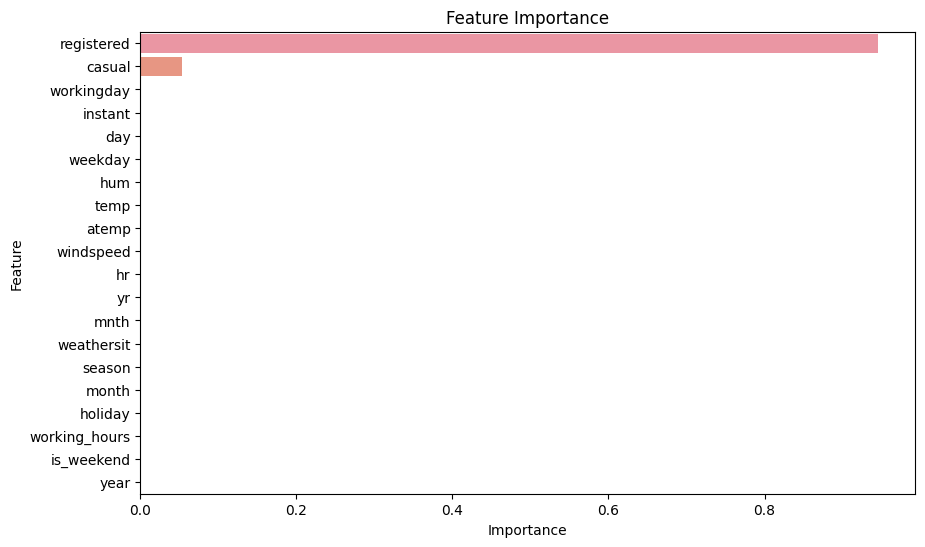

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


##

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.2 MB/s eta 0:00:00


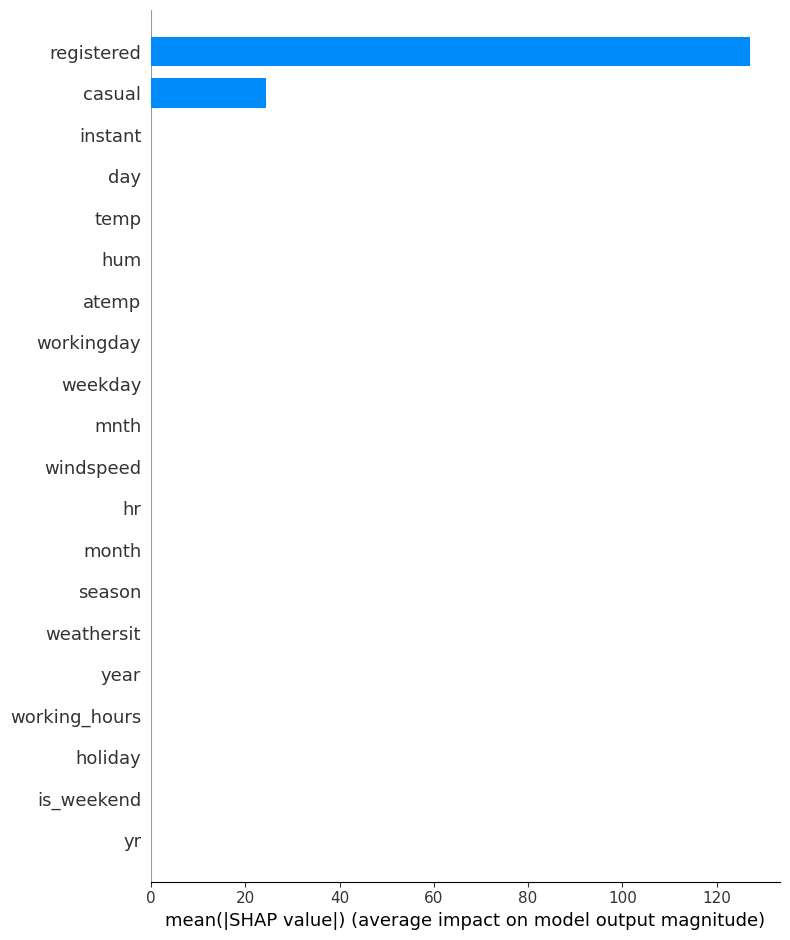

In [38]:
!pip install shap
import shap

# Selecting the best model
explainer = shap.TreeExplainer(gbr_best)

# calculate shap values on validation data
shap_values = explainer.shap_values(X_test)

# plot the shap values
shap.summary_plot(shap_values, X_test, plot_type="bar")
